## Importing Libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Importing Dataset

In [196]:
df=pd.read_csv('train_E6oV3lV.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [197]:
#datatypes info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## preprocessing Step

In [198]:
#remove pattern
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt=re.sub(word,"",input_txt)
    return input_txt
    

In [199]:
#remove twitter handle (@user)
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

In [200]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [201]:
#remove special charecter, number and punctuation
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")

In [202]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [203]:
#remove short words
df['clean_tweet']=df['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3 ]))

In [204]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [205]:
#individual words considerd as tockens 
tockenize_tweet=df['clean_tweet'].apply(lambda x:x.split())

In [206]:
tockenize_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [207]:
#stemming
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
tockenize_tweet=tockenize_tweet.apply(lambda sentence:[stemmer.stem(word) for word in sentence])
tockenize_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [208]:
#combine words into single sentence
for i in range(len(tockenize_tweet)):
    tockenize_tweet[i]=" ".join(tockenize_tweet[i])
df['clean_tweet']=tockenize_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


### Expploratory Data Analysis

In [209]:
!pip install wordcloud

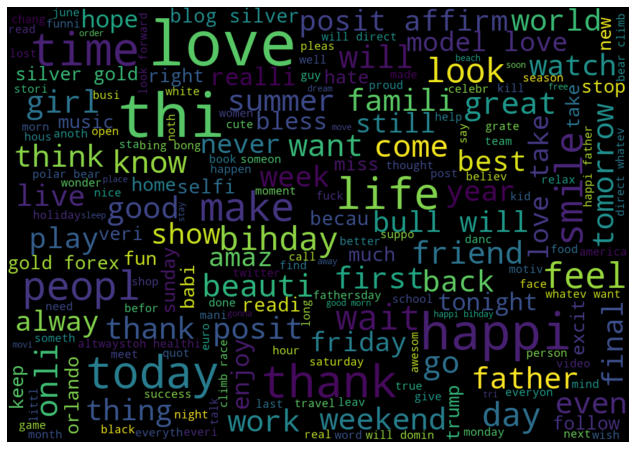

In [210]:
#display Frequent Words
all_words=" ".join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=1000,height=700,random_state=42,max_font_size=100).generate(all_words) 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

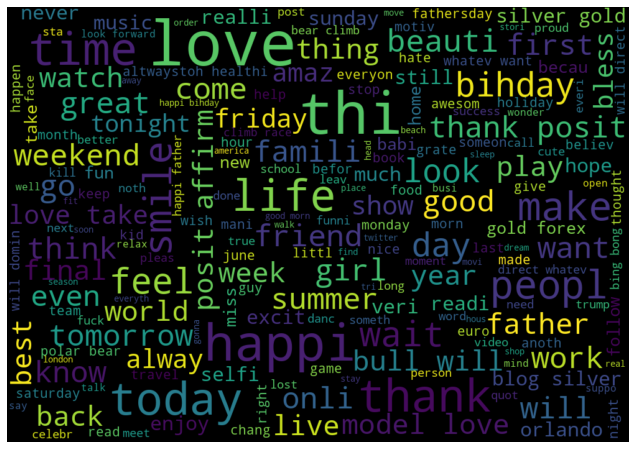

In [211]:
#frequent words visualization for positive 
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud=WordCloud(width=1000,height=700,random_state=42,max_font_size=100).generate(all_words) 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

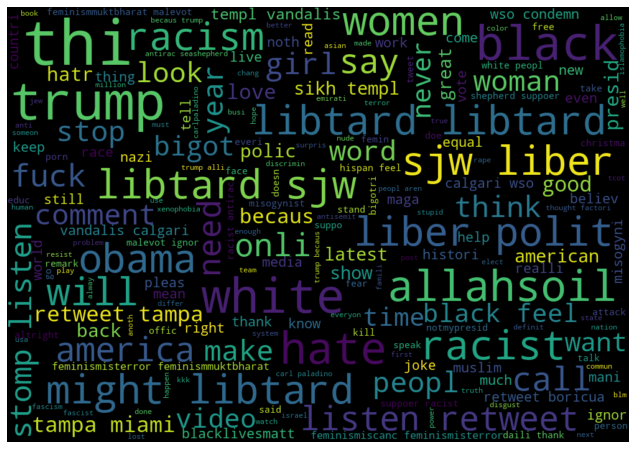

In [212]:
#frequent negative words Visaualization
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud=WordCloud(width=1000,height=700,random_state=42,max_font_size=100).generate(all_words) 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [213]:
#extact the hashtags
def hashtag_extract(tweets):
    hashtags=[]
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags


In [214]:
#extracting hashtags for Positive and negative words in the tweet
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])


ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])


In [215]:
ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [216]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [217]:
#unnest list
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [218]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [219]:
freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'hashtag':list(freq.keys()),
               'Count':list(freq.values())})
d.head()

,hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


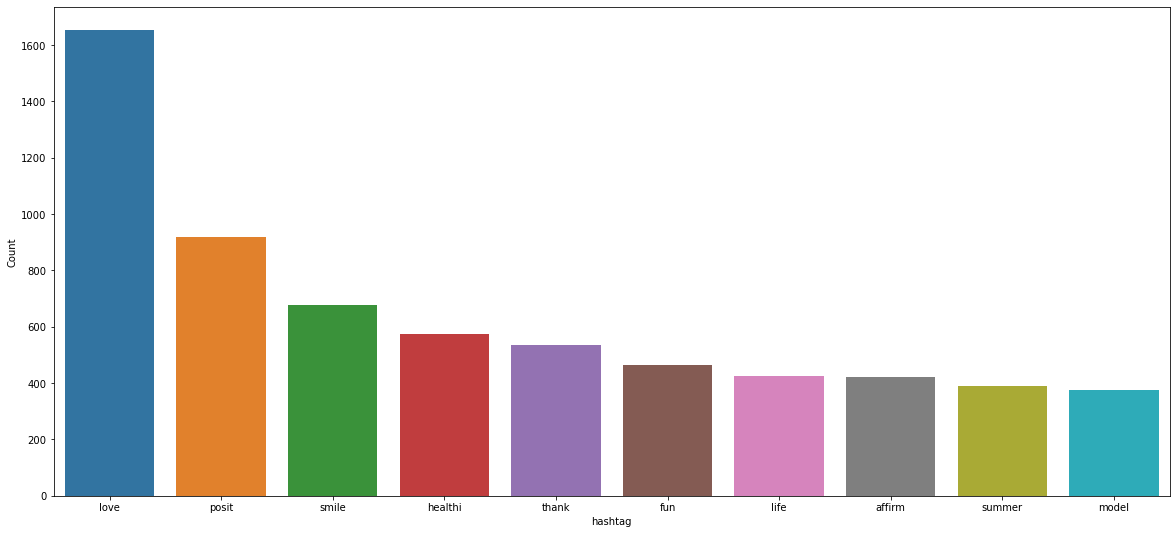

In [220]:
#select top 10 hashtags 
d=d.nlargest(columns='Count',n=10)
#print(d)
plt.figure(figsize=(20,9))
sns.barplot(data=d,y='Count',x='hashtag')
plt.show()

In [221]:
# for negative
freq=nltk.FreqDist(ht_negative)
d=pd.DataFrame({'hashtag':list(freq.keys()),
               'Count':list(freq.values())})
d.head()

,hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


<AxesSubplot:xlabel='hashtag', ylabel='Count'>

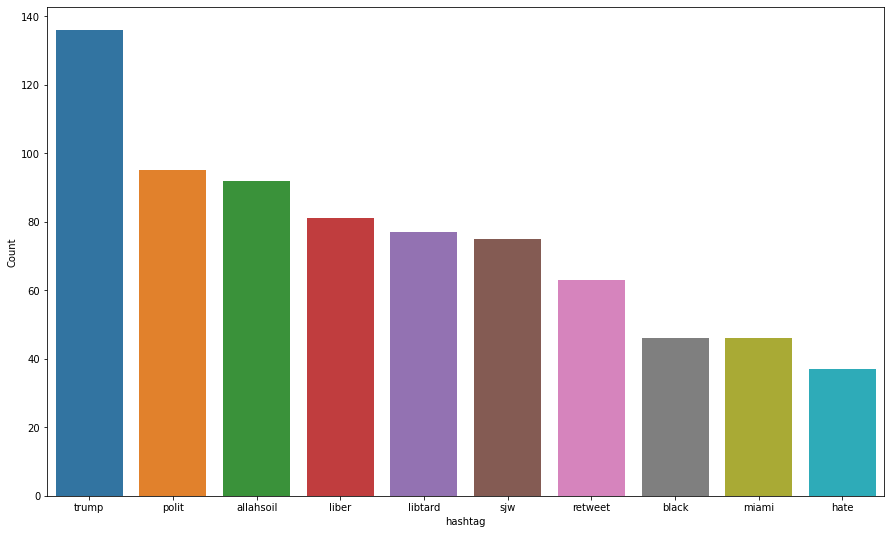

In [222]:
# plotting
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='hashtag',y='Count')

## Input Split

In [223]:
#Feature Selection
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])


In [224]:
# bow[0].toarray()

In [225]:
# splitting for training and testing


In [226]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df['label'],random_state=54,test_size=0.40)

## Model Train

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [228]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [229]:
pred=model.predict(x_test)

In [230]:
f1_score(y_test,pred)

0.5294985250737463

In [231]:
accuracy_score(y_test,pred)*100

95.00977708251858